In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def generate_result(class_num,ins_num):
    result = [tuple(np.random.randint(0,class_num,2)) for i in range (ins_num)]
    return result

In [37]:
result2 = generate_result(3, 20)
print(result2)

[(0, 0), (1, 1), (2, 0), (0, 0), (0, 2), (0, 2), (2, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (2, 2), (0, 0), (1, 0), (1, 0), (1, 1), (1, 2), (0, 2), (2, 1)]


In [38]:
class Evaluation:
    num_of_class = 0
    num_of_inst = 0
    result = []
    multiclass_matrix=None
    correct_pre = []
    actual_num = []
    predict_num = []
    
    def __init__(self,result,num_of_class):
        self.result = result
        self.num_of_class = num_of_class
        self.num_of_inst = len(result)
    
    def generate_matrix(self):
        matrix = np.zeros((self.num_of_class, self.num_of_class))
        for tup in self.result:
            matrix[tup[0]][tup[1]]+=1
        return matrix
    
    def precess_matrix(self):
        self.correct_pre = [self.multiclass_matrix[i][i] for i in range(self.num_of_class)]
        self.actual_num = [self.multiclass_matrix[i].sum() for i in range(self.num_of_class)]
        self.predict_num = [self.multiclass_matrix[:,i].sum() for i in range(self.num_of_class)]
    
    
    def calculate_accuracy(self):
        accuracy = sum(self.correct_pre)/sum(self.actual_num)
        return accuracy
    
    def calculate_Macro_value(self):
        ###precision###
        precision = sum([self.correct_pre[i]/self.predict_num[i] for i in range(self.num_of_class)])/self.num_of_class
        ###recall###
        recall = sum([self.correct_pre[i]/self.actual_num[i] for i in range(self.num_of_class)])/self.num_of_class
        return [precision, recall]
    
    
    def calculate_Micro_value(self):
        ###precision###
        precision = sum(self.correct_pre)/sum(self.predict_num)
        ###recall###
        recall = sum(self.correct_pre)/sum(self.actual_num)
        return [precision, recall]
    
    def calculate_weight_value(self):
        ###precision###
        precision = sum([(self.actual_num[i]/self.num_of_inst)*(self.correct_pre[i]/self.predict_num[i])for i in range(self.num_of_class)])
        recall = sum([(self.actual_num[i]/self.num_of_inst)*(self.correct_pre[i]/self.actual_num[i])for i in range(self.num_of_class)])
        return [precision, recall]
        
        
    def draw_heatmap_d(self):
        sns.heatmap(self.multiclass_matrix, vmin=0, vmax=len(self.result), annot=True,cmap="RdPu_r", fmt='.20g')
        plt.show()
        
    def draw_heatmap_f(self):
        sns.heatmap(self.multiclass_matrix/len(self.result), vmin=0, vmax=1, annot=True,cmap="RdPu_r", fmt='.2g')
        plt.show()  
        
    def draw_bar_chart(self):
        names = ["calss"+str(i) for i in range(self.num_of_class)]
        plt.figure(figsize=(10,6), dpi=80)
        x = range(len(names))
        
        plt.bar(x, self.actual_num, width=0.1)
        plt.bar([i + 0.1 for i in x], self.predict_num, width=0.1)
        plt.bar([i + 0.2 for i in x], self.correct_pre, width=0.1)

        plt.xticks([i + 0.05 for i in x], names)
        
        plt.xlabel('Class Name', fontsize=14)
        plt.ylabel('Number Of Each Class', fontsize=14)
        plt.show()
        
        
        
    def evaluate(self):
        self.multiclass_matrix = self.generate_matrix()
        self.precess_matrix()
        #self.draw_heatmap_d()
        #self.draw_heatmap_f()
        #self.draw_bar_chart()
        ################################Calculate Accuracy##################################
        accuracy = self.calculate_accuracy()
        
        print("accuracy is: %f" %accuracy)
        print("error rate is: %f"%(1-accuracy))

        ##macro averaging
        precisionMa, recallMa = self.calculate_Macro_value()
        print("Marco averaging precision is: %f" %precisionMa)
        print("Marco averaging recall is: %f" %recallMa)
        
        #micro averaging
        precisionMi, recallMi = self.calculate_Micro_value()
        print("Mirco averaging precision is: %f" %precisionMi)
        print("Mirco averaging recall is: %f" %recallMi)
        
        #weight averaging
        precisionWe, recallWe = self.calculate_weight_value()
        print("weight averaging precision is: %f" %precisionWe)
        print("weight averaging recall is: %f" %recallWe)
        
        
        

In [39]:
evalue = Evaluation(result2, 3)
evalue.evaluate()

accuracy is: 0.500000
error rate is: 0.500000
Marco averaging precision is: 0.466667
Marco averaging recall is: 0.448413
Mirco averaging precision is: 0.500000
Mirco averaging recall is: 0.500000
weight averaging precision is: 0.520000
weight averaging recall is: 0.500000


In [235]:
def generate_matrix(result, num_of_class):
    matrix = np.zeros((num_of_class, num_of_class))
    for tup in result:
        matrix[tup[0]][tup[1]]+=1
    return matrix

In [259]:
def evaluate2(result, num_of_class):
    #generate the matrix
    multiclass_matrix = generate_matrix(result, num_of_class)
    
    
    ################################Calculate Accuracy##################################
    correct_pre = [multiclass_matrix[i][i] for i in range(num_of_class)]
    actual_num = [multiclass_matrix[i].sum() for i in range(num_of_class)]
    predict_num = [multiclass_matrix[:,i].sum() for i in range(num_of_class)] 
    print(multiclass_matrix)
    print(correct_pre)
    print(actual_num)
    print(predict_num)
    ###accuracy###
    accuracy = sum(correct_pre)/sum(actual_num)
    ####Macro_averaging####
    ###precision###
    precisionM = sum([correct_pre[i]/predict_num[i] for i in range(num_of_class)])/num_of_class
    ###recall###
    recallM = sum([correct_pre[i]/actual_num[i] for i in range(num_of_class)])/num_of_class
    print("accuracy is: %f" %accuracy)
    print("precision is: %f" %precisionM)
    print("recall is: %f" %recallM)
    print("error rate is: %f"%(1-accuracy))
    
    
    #################################Draw The Heatmap###################################
    ####################整数##################
    #画heatmap
    sns.heatmap(multiclass_matrix, vmin=0, vmax=len(result), annot=True,cmap="RdPu_r", fmt='.20g')
    plt.show()
    ####################小数##################
    sns.heatmap(multiclass_matrix/len(result), vmin=0, vmax=1, annot=True,cmap="RdPu_r", fmt='.2g')
    plt.show()
    
    ###############################柱状图##################################
    names = ["calss"+str(i) for i in range(num_of_class)]
    
    plt.figure(figsize=(10,6), dpi=80)

    # 先得到movie_name长度, 再得到下标组成列表
    x = range(len(names))

    plt.bar(x, actual_num, width=0.1)
    # 向右移动0.2, 柱状条宽度为0.2
    plt.bar([i + 0.1 for i in x], predict_num, width=0.1)
    
    plt.bar([i + 0.2 for i in x], correct_pre, width=0.1)

    # 底部汉字移动到两个柱状条中间(本来汉字是在左边蓝色柱状条下面, 向右移动0.1)
    plt.xticks([i + 0.05 for i in x], names)
    
    plt.xlabel('Class Name', fontsize=14)
    plt.ylabel('Number Of Each Class', fontsize=14)
    plt.show()

accuracy is: 0.280000
precision is: 0.285572
recall is: 0.286029
error rate is: 0.720000


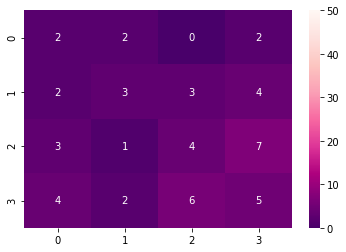

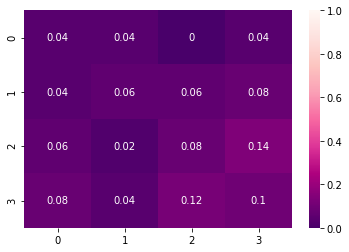

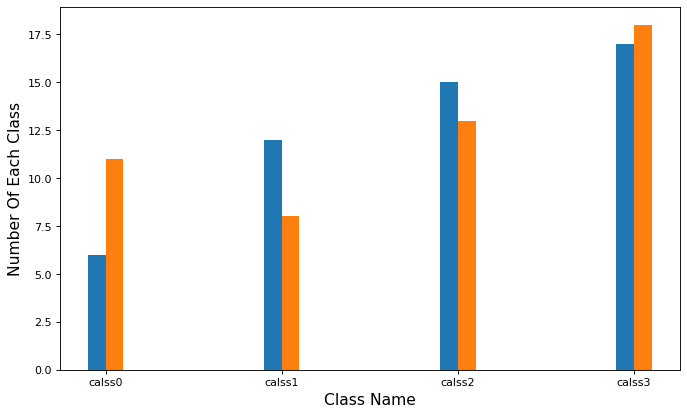

In [237]:
evaluate2(result2, 4)

1728
[[1162.   46.    2.    0.]
 [  85.  289.   10.    0.]
 [   0.   46.   21.    2.]
 [   0.   30.    0.   35.]]
[1162.0, 289.0, 21.0, 35.0]
[1210.0, 384.0, 69.0, 65.0]
[1247.0, 411.0, 33.0, 37.0]
accuracy is: 0.872106
precision is: 0.804327
recall is: 0.638936
error rate is: 0.127894


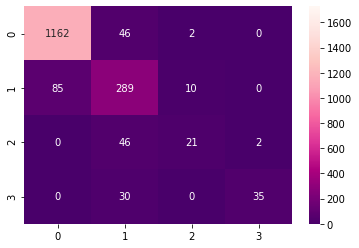

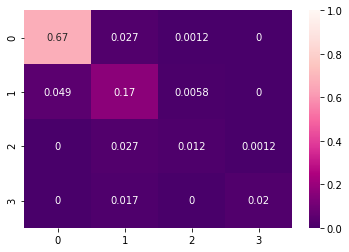

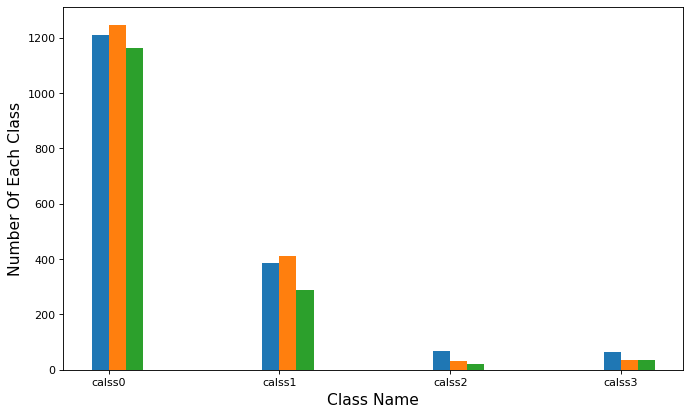

In [260]:
print(len(result))
evaluate2(result, 4)

In [230]:
#只有两个class
result1 = generate_result(2, 20)
print(result1)

[(1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (1, 0), (0, 1), (0, 0), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 1)]


In [231]:
def find_error_table(result):
    #error table [TP, FN, FP, TN]
    error_table = [0, 0, 0, 0]
    for i in range(len(result)):
        if(result[i] == (1, 1)):error_table[0]+=1
        elif(result[i] == (1, 0)):error_table[1]+=1
        elif(result[i] == (0, 1)):error_table[2]+=1
        else:error_table[3]+=1

    return error_table

In [232]:
#先处理两个class的
def evaluate(result):
    
    
    #######################Calculate Accuracy and Error Type#######################
    error_tab = find_error_table(result)
    
    #accuracy = (TP+TN)/(TP+FN+FP+TN)
    accuracy = (error_tab[0]+error_tab[3])/len(result)
    #precision = TP/(TP+FP)
    precision = error_tab[0]/(error_tab[0]+error_tab[2])
    #recall = TP/(TP+FN)
    recall = error_tab[0]/(error_tab[0]+error_tab[1])
    #error rate
    error_rate = 1-accuracy
    print("accuracy is: %f" %accuracy)
    print("precision is: %f" %precision)
    print("recall is: %f" %recall)
    print("error rate is: %f"%error_rate)
    
    #################################Draw The Heatmap###################################
    #转换成numpy array
    err_table = np.array(error_tab)
    x = err_table.reshape(2,2)
    ####################整数##################
    #画heatmap
    sns.heatmap(x, vmin=0, vmax=len(result), annot=True,cmap="RdPu_r")
    plt.show()
    ####################小数##################
    sns.heatmap(x/len(result), vmin=0, vmax=1, annot=True,cmap="RdPu_r")
    plt.show()
    
    
    ###############################柱状图##################################
    act_1 = error_tab[0]+error_tab[1]
    act_0 = error_tab[2]+error_tab[3]
    pre_1 = error_tab[0]+error_tab[2]
    pre_0 = error_tab[1]+error_tab[3] 
    
    plt.figure(figsize=(10,6), dpi=80)
    names = ['1','0']
    actual = [act_1, act_0]
    predict = [pre_1, pre_0]

    # 先得到movie_name长度, 再得到下标组成列表
    x = range(len(names))

    plt.bar(x, actual, width=0.1)
    # 向右移动0.2, 柱状条宽度为0.2
    plt.bar([i + 0.1 for i in x], predict, width=0.1)
    # 底部汉字移动到两个柱状条中间(本来汉字是在左边蓝色柱状条下面, 向右移动0.1)
    plt.xticks([i + 0.05 for i in x], names)
    plt.xlabel('Class Name', fontsize=14)
    plt.ylabel('Number Of Each Class', fontsize=14)
    plt.show()

accuracy is: 0.550000
precision is: 0.666667
recall is: 0.615385
error rate is: 0.450000


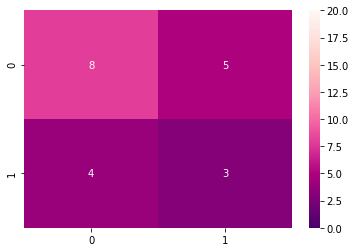

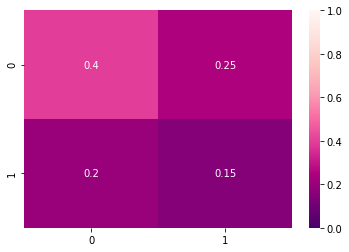

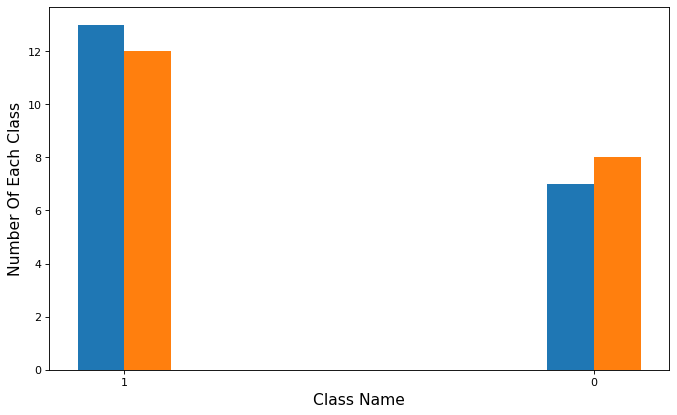

In [233]:
evaluate(result1)

In [238]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math
from collections import defaultdict
from functools import reduce

################################

class ClassCounter:
    def __init__(self, subject):
        self.subject = subject

    def prepare(self, class_num):
        self.__classes_count = [0] * class_num
        self.__classes_prob = [0] * class_num
    
    def add(self, class_index):
        self.__classes_count[class_index] += 1
    
    def run(self):
        total = sum(self.__classes_count)
        for index, val in enumerate(self.__classes_count):
            self.__classes_prob[index] = val/total
    
    def get(self):
        return tuple(self.__classes_prob)
    
class AttrCounter:
    def __init__(self, name):
        self.name = name

    def prepare(self, class_num):
        return
    
    def add(self, attr, class_index):
        return 
    
    def run(self):
        return 
    
    def get(self, attr):
        return 0
    
class NomCounter(AttrCounter):
    __smooth_alpha = 1
    def __init__(self, name):
        super().__init__(name)

    def prepare(self, class_num):
        self.__attr_vals = set()
        self.__attr_count = [defaultdict(int) for i in range(class_num)]
        self.__attr_prob = [defaultdict(float) for i in range(class_num)]      
    
    def add(self, attr, class_index):
        self.__attr_vals.add(attr)
        self.__attr_count[class_index][attr] += 1
    
    def run(self):
        dimension = len(self.__attr_vals)
        for index, attrs in enumerate(self.__attr_count):
            total = reduce(lambda x, y: x + y, attrs.values())
            for val in self.__attr_vals:
                self.__attr_prob[index][val] = self._laplace_smooth(attrs[val], total, dimension)
    
    def get(self, attr): 
        return tuple(prob[attr] for prob in self.__attr_prob)

    def _laplace_smooth(self, num, total, dimension):
        return (num+self.__smooth_alpha)/(total+dimension*self.__smooth_alpha)
    
class NumCounter(AttrCounter):
    def __init__(self, name):
        super().__init__(name)

    def prepare(self, class_num):
        self.__attr_data = [[] for i in range(class_num)]
        self.__mean = [0] * class_num
        self.__deviation = [0] * class_num
    
    def add(self, attr, class_index):
        self.__attr_data[class_index].append(float(attr))
    
    def run(self):
        for index, data in enumerate(self.__attr_data):
            mean = sum(data)/len(data)
            deviation = math.sqrt(sum([(x - mean)**2 for x in data])/(len(data)-1))
            self.__mean[index] = mean
            self.__deviation[index] = deviation
        #print(self.__mean, self.__deviation)
    
    def get(self, attr):
        return tuple(self._normal_distribution(float(attr), self.__mean[i], self.__deviation[i]) for i in range(len(self.__mean)))
    
    def _normal_distribution(self, val, mean, deviation):
        return 1/(deviation*math.sqrt(2*math.pi))*np.exp(-((val-mean)/deviation)**2/2) if deviation > 0 else 0
    
class Num2NomCounter(NomCounter):  
    def __init__(self, name, bins):
        assert(bins >= 2)
        super().__init__(name)
        self.__bins = bins

    def prepare(self, class_num):
        self.__split = [0] * (self.__bins-1)
        self.__attr_data = []
        self.__attr_count = [[0]*self.__bins for i in range(class_num)]
        self.__attr_prob = [[0]*self.__bins for i in range(class_num)]
    
    def add(self, attr, class_index):
        self.__attr_data.append((float(attr), class_index))
    
    def run(self):
        self.__attr_data.sort()
        gaps = self.__split_integer(len(self.__attr_data),self.__bins)
        cur = 0
        for i in range(self.__bins-1):
            npos = sum(gaps[:i+1])
            self.__split[i] = self.__attr_data[npos][0]
            for j in range(cur, npos):
                self.__attr_count[self.__attr_data[j][1]][i] += 1
            cur = npos
        for j in range(cur, len(self.__attr_data)):
            self.__attr_count[self.__attr_data[j][1]][i+1] += 1           
        for index,attrs in enumerate(self.__attr_count):
            total = reduce(lambda x, y: x + y, attrs)
            for val, num in enumerate(attrs):
                self.__attr_prob[index][val] = self._laplace_smooth(num, total, self.__bins)
        # print(self.__split)
        # print(self.__attr_count)
        # print(self.__attr_prob)
        # print("____________")
    
    def get(self, attr):
        attr = float(attr)
        for i in range(self.__bins):
            if i >= len(self.__split) or attr < self.__split[i]:
                break
        return tuple(prob[i] for prob in self.__attr_prob)
    
    def __split_integer(self, m, n):
        quotient = int(m / n)
        remainder = m % n
        if remainder > 0:
            return [quotient] * (n - remainder) + [quotient + 1] * remainder
        if remainder < 0:
            return [quotient - 1] * -remainder + [quotient] * (n + remainder)
        return [quotient] * n
    
class Nom2NumCounter(NumCounter):
    def __init__(self, name, mapper):
        super().__init__(name)
        self.__mapper = mapper
    
    def add(self, attr, class_index):
        self._attr_data[class_index].append(self.__mapper(attr))

class Model:
    def __init__(self, classes, *counters):
        self.__classes = {classname:index for index,classname in enumerate(classes)}
        self.__counters = counters
        self.__filters = ()
        self.__dump_firt_column = False
        for index, counter in enumerate(counters):
            if isinstance(counter, ClassCounter):
                self.__classpos = index
            counter.prepare(len(classes))
            
    def set_filters(self, filters):
        self.__filters = filters
        
    def set_dump_firt_column(self, enabled):
        self.__dump_firt_column = enabled
            
    def preprocess(self, lines):
        for line in lines:
            inputs = line.strip().split(",")[1:] if self.__dump_firt_column else line.strip().split(",")
            if not inputs or not inputs[0]:
                continue
            class_index = self.__classes[inputs[self.__classpos]]
            for i, val in enumerate(inputs):
                if val not in self.__filters:
                    if i == self.__classpos:
                        self.__counters[i].add(class_index)
                    else:
                        self.__counters[i].add(val, class_index)
                
    def train(self):
        for counter in self.__counters:
            counter.run()

    def test(self, lines):
        res = []
        flag = 1
        for line in lines:
            inputs = line.strip().split(",")[1:] if self.__dump_firt_column else line.strip().split(",")
            if not inputs or not inputs[0]:
                continue
            real = self.__classes[inputs[self.__classpos]]
            predict = []
            for i, val in enumerate(inputs):
                if i == self.__classpos:
                    predict.append(np.array(self.__counters[i].get()))
                else:
                    predict.append(np.array(self.__counters[i].get(val)))
            res.append((real, np.argmax(reduce(lambda x, y: x*y, predict))))
        return res

In [239]:
filename = "datasets/car.data"
classes = ("unacc" , "acc", "good", "vgood")
model = Model(
    classes,
    NomCounter("buying"),
    NomCounter("maint"),
    NomCounter("doors"),
    NomCounter("persons"),
    NomCounter("lug_boot"),
    NomCounter("safety"),
    ClassCounter("Car Evaluation")
)

In [248]:
with open(filename,"r") as file:
    lines = file.readlines()
    model.preprocess(lines)
    model.train()
    result = model.test(lines)